In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
#네이버 API로 카페 탐색
import os
import sys
import urllib.request
import json

client_id = "Ff5Gg338LgLSGheX23Ne"
client_secret = "p2b2tBaYeg"

encText = urllib.parse.quote("진에어")

result_list = []

for temp in range(1,1000,100):
  url = "https://openapi.naver.com/v1/search/cafearticle?query=" + encText + "&display=100&start="+str(temp)  # JSON 결과
  # url = "https://openapi.naver.com/v1/search/cafe.xml?query=" + encText # XML 결과
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()

      cafe_data = json.loads(response_body)
      print('총 데이터 갯수 : ', cafe_data['total'])
      print('출력된 카페 갯수:',len(cafe_data['items']))
      
  else:
      print("Error Code:" + rescode)


  for temp in cafe_data['items']:
      temp_dict = {}
      link = temp['link']
      des = temp['description']   

      if  'http://cafe.' in link:
          link = link.replace('http://cafe.','http://m.cafe.')
          
      temp_dict['link'] = link
      temp_dict['description'] = des
      result_list.append(temp_dict)
      


총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100
총 데이터 갯수 :  252156
출력된 카페 갯수: 100


In [3]:
#결과 출력
result_list

[{'link': 'http://m.cafe.naver.com/taesarang/660841',
  'description': '직항만 찾았는데 <b>진에어</b>랑 비슷한 비용으로 잘못봤던건지... 오늘 오후 <b>진에어</b> 홈피들어가보니 같은일정 비슷한 시간에 운행하는데 요금이 100이상 저령하네요..ㅡ.ㅡ 바꾸는게 나을까요? <b>진에어</b>로 국외선 탄 적이... '},
 {'link': 'http://m.cafe.naver.com/guamfree/2507480',
  'description': '다음주 화요일에 출국 예정이여서 이티켓을 출력하려고 <b>진에어</b> 홈페이지에 들어갔는데 <b>진에어</b>에서는 <b>진에어</b>에서 예약한 것만 이티켓을 발행해준다고 하는데 저는 트립닷컴으로 예약했거든요.. 이런 경우에는 어뜩해... '},
 {'link': 'http://m.cafe.naver.com/jpnstory/3141064',
  'description': '입국을 <b>진에어</b> 공동운항으로 하는데 수하물 규정이 궁금해서 알아보니 <b>진에어</b> 홈페이지에 올라온 내용입니다 모닝캄이라 수하물 2개 보낼 예정인데 대한항공 기준으로 처리되는게 맞겠죠? 생각 못하고 엄청 샀는데... '},
 {'link': 'http://m.cafe.naver.com/thaiinfo/512079',
  'description': '5월초에 <b>진에어</b>로 푸켓들어가는데요 <b>진에어</b>를 예약했습니다 초등남매둘이라 긴비행시간을 어찌할까 걱정인데요 대한항공은 모니터가 있던데 <b>진에어</b>는 없나요? 그런데 <b>진에어</b> 예약하신분들이 이어폰을 준비한다고... '},
 {'link': 'http://m.cafe.naver.com/happyibook/3652249',
  'description': '6월항공권 예약을하려고 보니 <b>진에어</b> 인천 17시15분출발 다낭 21시출발 아시아나 인천 18시50분출발 다낭 23시5분출발 가

In [4]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import requests
from bs4 import BeautifulSoup

result_text = ''
link_temp = result_list[1]
if 'http://m.cafe.naver' in link_temp['link']:
    print(link_temp['link'])
    html = requests.get(link_temp['link'])
    soup = BeautifulSoup(html.text , 'html.parser')
    print(html.text)
    result = soup.find_all('span',class_='se-fs-')
    len(result)
    for temp in result:
        result_text += temp.text



'''
for link_temp in result_list:
    if 'http://m.cafe.naver' in link_temp['link']:
        html = requests.get(link_temp['link'])
        soup = BeautifulSoup(html.text , 'html.parser')
        result = soup.find_all('span','se-fs-fs16')
        for temp in result:
            result_text += temp.text'''

result_text

http://m.cafe.naver.com/guamfree/2507480
<!DOCTYPE html><html lang=ko><head><title>네이버 카페</title><meta charset=utf-8><meta name=viewport content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no,target-densitydpi=medium-dpi,viewport-fit=cover"><meta name=robots content="noindex, nofollow"><meta name=referrer content=always><link rel="shortcut icon" type=image/x-icon href=https://ca-fe.pstatic.net/web-mobile/favicon.ico><link rel=apple-touch-icon-precomposed sizes=120x120 href=https://cafe.pstatic.net/mobile/img/favicon2016/iOS7_120X120_iphone.png><link rel=apple-touch-icon-precomposed sizes=152x152 href=https://cafe.pstatic.net/mobile/img/favicon2016/iOS7_152X152_ipad_retina.png><link rel=apple-touch-icon-precomposed sizes=167x167 href=https://cafe.pstatic.net/mobile/img/favicon2016/iOS9_167X167_ipadpro.png><link rel=apple-touch-icon-precomposed sizes=180x180 href=https://cafe.pstatic.net/mobile/img/favicon2016/iOS8_180X180_iphone6plus.png><link rel=a

''

In [6]:
from konlpy.tag import Okt
import re
from collections import Counter

okt = Okt()
results=[]
#리스트로 문장들 형태 옮김

slist = list(result_list)
for i in range(len(result_list)):
  nodict = str(result_list[i].values())
  result = okt.pos(nodict)
  results.append(result)


In [7]:
#품사와 결과 확인
results

[[('dict', 'Alpha'),
  ('_', 'Punctuation'),
  ('values', 'Alpha'),
  ('([', 'Foreign'),
  ("'http://m.cafe.naver.com/taesarang/660841", 'URL'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('직항', 'Noun'),
  ('만', 'Josa'),
  ('찾았는데', 'Verb'),
  ('<', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('진에어', 'Noun'),
  ('</', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('랑', 'Josa'),
  ('비슷한', 'Adjective'),
  ('비용', 'Noun'),
  ('으로', 'Josa'),
  ('잘', 'VerbPrefix'),
  ('못', 'VerbPrefix'),
  ('봤던', 'Verb'),
  ('건지', 'Verb'),
  ('...', 'Punctuation'),
  ('오늘', 'Noun'),
  ('오후', 'Noun'),
  ('<', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('진에어', 'Noun'),
  ('</', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('홈피', 'Noun'),
  ('들어가', 'Verb'),
  ('보니', 'Verb'),
  ('같은', 'Adjective'),
  ('일정', 'Noun'),
  ('비슷한', 'Adjective'),
  ('시간', 'Noun'),
  ('에', 'Josa'),
  ('운행', 'Noun'),
  ('하는데', 'Verb'),
  ('요금', 'Noun'),
  ('이', 'Josa'),

In [8]:
n_result = []
for i in range(len(results)):
  results_sentences = results[i]
  for temp1,temp2 in results_sentences:
      if temp2 in ['Noun']:
        if len(temp1)>1:
          n_result.append(temp1)
n_result

['직항',
 '진에어',
 '비용',
 '오늘',
 '오후',
 '진에어',
 '홈피',
 '일정',
 '시간',
 '운행',
 '요금',
 '이상',
 '진에어',
 '외선',
 '다음주',
 '화요일',
 '출국',
 '예정',
 '티켓',
 '출력',
 '진에어',
 '홈페이지',
 '진에어',
 '진에어',
 '예약',
 '티켓',
 '발행',
 '트립',
 '예약',
 '경우',
 '입국',
 '진에어',
 '운항',
 '수하물',
 '규정',
 '진에어',
 '홈페이지',
 '내용',
 '모닝캄',
 '수하물',
 '예정',
 '대한항공',
 '기준',
 '처리',
 '생각',
 '진에어',
 '푸켓',
 '진에어',
 '예약',
 '초등',
 '남매',
 '비행',
 '시간',
 '어찌',
 '걱정',
 '대한항공',
 '모니터',
 '진에어',
 '진에어',
 '예약',
 '신분',
 '이어폰',
 '준비',
 '예약',
 '진에어',
 '인천',
 '다낭',
 '아시아나',
 '인천',
 '다낭',
 '가격',
 '성인',
 '아이',
 '예약',
 '할껀',
 '시간',
 '진에어',
 '아시아나',
 '대한항공',
 '계열',
 '사인',
 '진에어',
 '채용',
 '동안',
 '진행',
 '이번',
 '진행',
 '진에어',
 '채용',
 '객실',
 '승무원',
 '모집',
 '승무원',
 '취업',
 '목표',
 '소식',
 '진에어',
 '채용',
 '공고',
 '제주항공',
 '진에어',
 '결정',
 '고민',
 '수화물',
 '모두',
 '기내',
 '위탁',
 '추가',
 '가격',
 '정도',
 '예매',
 '그동안',
 '다른',
 '진에어',
 '진에어',
 '처음',
 '기내식',
 '신청',
 '사서',
 '가지',
 '음식',
 '반입',
 '가능',
 '가요',
 '진에어',
 '홈페이지',
 '요금',
 '국적',
 '비행기',
 '이제',
 '가요',
 '마카오',
 '거주',
 '진에어',
 '티웨이',


In [9]:
stop_words = '진에어 했어요 했습니다 합니다 어제 오늘 내일 비행기 타고'
stop_words = set(stop_words.split(' '))

n_adj = []
for word in n_result:
    if not word in stop_words:
        n_adj.append(word)

len(n_adj)

12227

In [10]:
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('예약', 192),
 ('좌석', 192),
 ('출발', 147),
 ('시간', 125),
 ('수화물', 121),
 ('혹시', 115),
 ('체크', 114),
 ('항공권', 112),
 ('공항', 99),
 ('도착', 93),
 ('가격', 86),
 ('대한항공', 74),
 ('여행', 74),
 ('인천', 72),
 ('항공', 71),
 ('변경', 70),
 ('무료', 68),
 ('제주항공', 65),
 ('지정', 65),
 ('취소', 64),
 ('가요', 63),
 ('면접', 63),
 ('추가', 62),
 ('성인', 61),
 ('이용', 61),
 ('기내식', 60),
 ('결제', 60),
 ('오전', 60),
 ('아이', 59),
 ('수하물', 56),
 ('이번', 55),
 ('특가', 55),
 ('위탁', 54),
 ('정도', 54),
 ('예매', 54),
 ('왕복', 54),
 ('모바일', 54),
 ('다낭', 53),
 ('구매', 53),
 ('티웨이', 52),
 ('지금', 52),
 ('지연', 50),
 ('부산', 49),
 ('항공사', 49),
 ('티켓', 48),
 ('캐리어', 48),
 ('고민', 47),
 ('접속', 47),
 ('일정', 44),
 ('예정', 44),
 ('출국', 42),
 ('기내', 41),
 ('운항', 40),
 ('확인', 40),
 ('미리', 40),
 ('후쿠오카', 40),
 ('에어', 40),
 ('서울', 40),
 ('답변', 40),
 ('필독', 40),
 ('대기', 40),
 ('신분', 39),
 ('처음', 39),
 ('준비', 38),
 ('연결', 38),
 ('아시', 38),
 ('일본', 38),
 ('오후', 37),
 ('승무원', 37),
 ('안내', 37),
 ('가족', 37),
 ('검색', 37),
 ('다른', 36),
 ('전화', 36),
 ('포함', 36),
 (

In [11]:
dict_wc = {}
for i in range(len(tags)):
  if tags[i][1] < 70:
    wordforwc = tags[i][0]
    freqforwc = tags[i][1]
    dict_wc[wordforwc] = freqforwc
  
dict_wc


{'무료': 68,
 '제주항공': 65,
 '지정': 65,
 '취소': 64,
 '가요': 63,
 '면접': 63,
 '추가': 62,
 '성인': 61,
 '이용': 61,
 '기내식': 60,
 '결제': 60,
 '오전': 60,
 '아이': 59,
 '수하물': 56,
 '이번': 55,
 '특가': 55,
 '위탁': 54,
 '정도': 54,
 '예매': 54,
 '왕복': 54,
 '모바일': 54,
 '다낭': 53,
 '구매': 53,
 '티웨이': 52,
 '지금': 52,
 '지연': 50,
 '부산': 49,
 '항공사': 49,
 '티켓': 48,
 '캐리어': 48,
 '고민': 47,
 '접속': 47,
 '일정': 44,
 '예정': 44,
 '출국': 42,
 '기내': 41,
 '운항': 40,
 '확인': 40,
 '미리': 40,
 '후쿠오카': 40,
 '에어': 40,
 '서울': 40,
 '답변': 40,
 '필독': 40,
 '대기': 40,
 '신분': 39,
 '처음': 39,
 '준비': 38,
 '연결': 38,
 '아시': 38,
 '일본': 38,
 '오후': 37,
 '승무원': 37,
 '안내': 37,
 '가족': 37,
 '검색': 37,
 '다른': 36,
 '전화': 36,
 '포함': 36,
 '생각': 35,
 '채용': 35,
 '질문': 35,
 '카운터': 35,
 '오사카': 34,
 '그냥': 34,
 '후기': 34,
 '쿠폰': 34,
 '다시': 33,
 '시간대': 33,
 '선택': 33,
 '사전': 33,
 '입국': 32,
 '비행': 32,
 '제주': 32,
 '탑승': 32,
 '오픈': 32,
 '댓글': 32,
 '홈페이지': 31,
 '신청': 31,
 '문의': 31,
 '날짜': 31,
 '아침': 30,
 '진행': 29,
 '모두': 29}

In [12]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
#한글설치
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

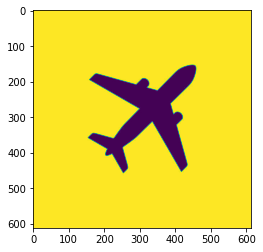

In [14]:
plane = Image.open('/content/pngwing.png')    # 마스크가 될 이미지 불러오기 
plt.imshow(plane)

mask = Image.new("RGB", plane.size, (255,255,255))
mask.paste(plane,plane)
mask = np.array(mask)

(-0.5, 611.5, 611.5, -0.5)

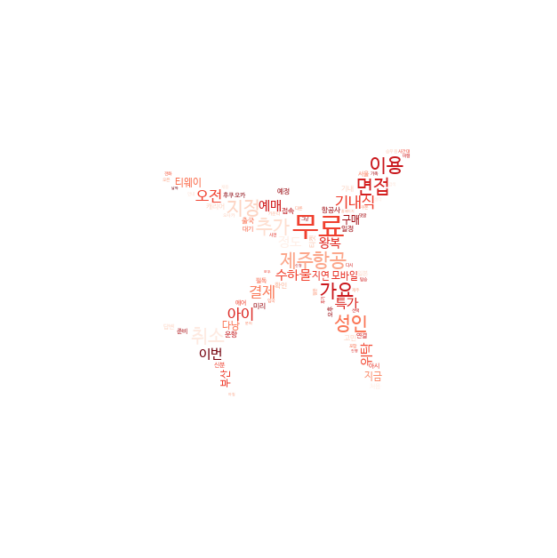

In [15]:

font_path = r"/System/Library/Fonts/Supplemental/AppleGothic.ttf"
wc = WordCloud(font_path = 'NanumBarunGothic',
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색은 빨간색으로
    mask = mask,
).generate_from_frequencies(dict_wc)
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게